# EXPERIMENT-13

## Aim: Feature extraction Using HOG and SIFT

## Theory:


### HOG

The Histogram of Oriented Gradients (HOG) is a feature descriptor employed to detect objects in images by emphasizing edge structures. Its process includes:

- **Gradient Calculation:** Determines the intensity change for each pixel.
- **Orientation Binning:** Sorts gradients into bins based on their direction (angles).
- **Block Normalization:** Adjusts gradient values to mitigate lighting differences.
- **Descriptor Construction:** Creates a feature vector used for object detection.

HOG is commonly used in object detection tasks, such as pedestrian detection, due to its effectiveness in capturing shape and texture details.

### SIFT

The Scale-Invariant Feature Transform
(SIFT) is primarily known as a feature
extraction technique used in computer
vision for tasks like image matching,
object recognition, and image stitching.

Steps for SIFT
1. Scale-space Extrema Detection
2. Keypoint Localization
3. Orientation Assignment
4. Descriptor Calculation
5. Keypoint Matching



## Code

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Part-A: HOG

In [ ]:
from skimage.feature import hog


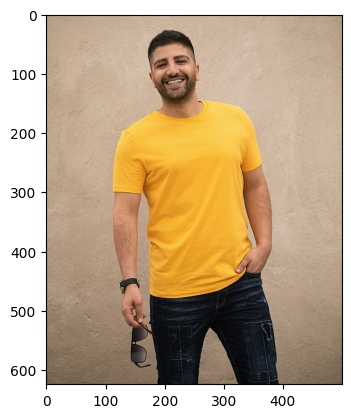

In [ ]:
img= cv2.imread('/content/drive/MyDrive/CVR_LAB_FILE/DATASET_Image/person.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [ ]:
img= cv2.resize(img, (64,128))

In [ ]:
hog_features, hog_img= hog(img, orientations=9, pixels_per_cell=(8,8),
                           cells_per_block=(2,2), visualize= True,
                           block_norm='L2', channel_axis=-1)

In [ ]:
hog_features

array([0.30734565, 0.21053521, 0.12726292, ..., 0.00813373, 0.00409501,
       0.02239756])

In [ ]:
len(hog_features)

3780

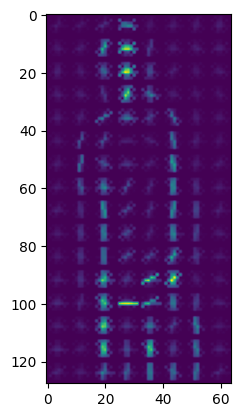

In [ ]:
plt.imshow(hog_img)

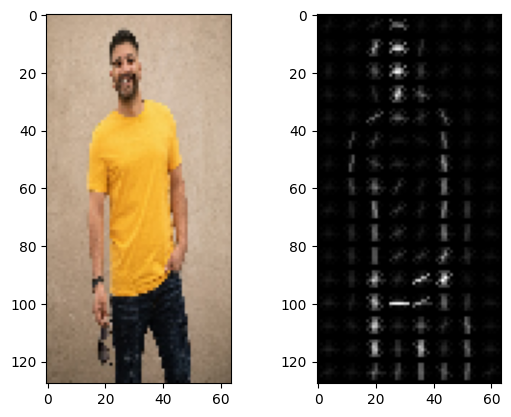

In [ ]:
plt.subplot(122)
plt.imshow(hog_img, cmap='gray')
plt.subplot(121)
plt.imshow(img)

##Part-B: Feature Extraction using SIFT transfrom

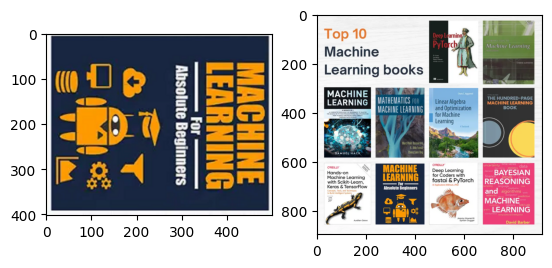

In [ ]:
img1= cv2.imread('/content/drive/MyDrive/CVR_LAB_FILE/DATASET_Image/pic1.png')
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2= cv2.imread('/content/drive/MyDrive/CVR_LAB_FILE/DATASET_Image/pic2.png')
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)

In [ ]:
sift= cv2.SIFT_create()

In [ ]:
keypoints1, descriptor1= sift.detectAndCompute(img1, None)
keypoints2, descriptor2= sift.detectAndCompute(img2, None)

In [ ]:
print(len(keypoints1))
print(len(keypoints2))

1225
5200


In [ ]:
print(descriptor1.shape)
print(descriptor2.shape)

(1225, 128)
(5200, 128)


In [ ]:
bf_matcher= cv2.BFMatcher_create()

matches = bf_matcher.knnMatch(descriptor1, descriptor2, k=2)

In [ ]:
good_matches=[]
for m,n in matches:
  if m.distance<0.3*n.distance:
    good_matches.append(m)

In [ ]:
threshold= 50
if len(good_matches) >=threshold:
  print("Images ae getting a match")
else:
  print("Images are not matching")

Images ae getting a match


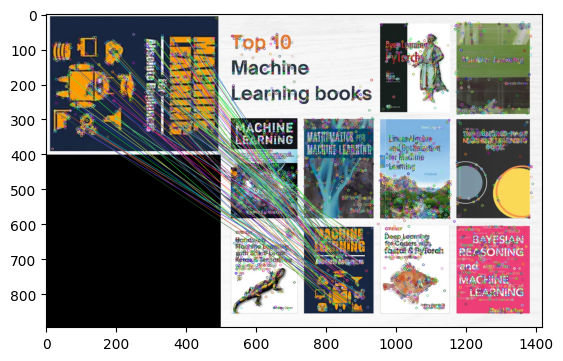

In [ ]:
matching_result= cv2.drawMatches(img1, keypoints1,
                                 img2, keypoints2, good_matches, None)

plt.imshow(matching_result)

#**TASK**



## 1. Import 'sample_image' and extract the HOG features from the image.


In [ ]:
sample_img= cv2.imread('/content/drive/MyDrive/CVR_LAB_FILE/DATASET_Image/sample_image.jpg')

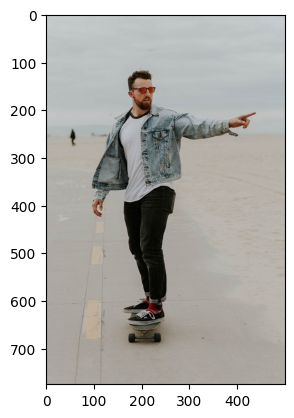

In [ ]:
sample_img= cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)

In [ ]:
sample_img= cv2.resize(sample_img, (64, 128))

In [ ]:
hog_features_1, hog_img_1= hog(sample_img, orientations=9, pixels_per_cell=(8,8),
                               cells_per_block=(2,2), visualize= True,
                               block_norm='L2', channel_axis=-1)

In [ ]:
len(hog_features_1)

3780

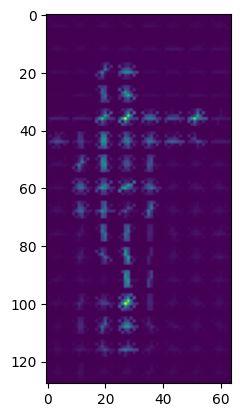

In [ ]:
plt.imshow(hog_img_1)

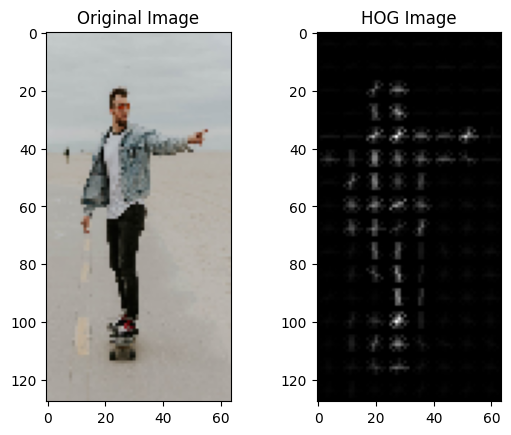

In [ ]:
plt.subplot(121)
plt.title('Original Image')
plt.imshow(sample_img)
plt.subplot(122)
plt.title('HOG Image')
plt.imshow(hog_img_1, cmap='gray')

##2. Apply SIFT on 'pic3.jpg' and 'pic4.jpg'

In [ ]:
img3= cv2.imread('/content/drive/MyDrive/CVR_LAB_FILE/DATASET_Image/pic3.jpg')
img3= cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img4= cv2.imread('/content/drive/MyDrive/CVR_LAB_FILE/DATASET_Image/pic4.jpg')
img4= cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)


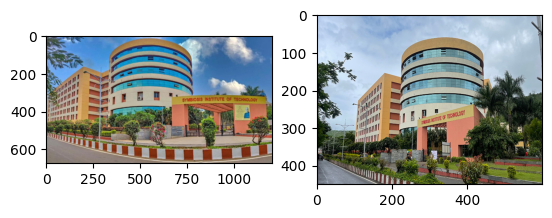

In [ ]:
plt.subplot(121)
plt.imshow(img3)
plt.subplot(122)
plt.imshow(img4)

In [ ]:
keypoints3, descriptor3= sift.detectAndCompute(img3, None)
keypoints4, descriptor4= sift.detectAndCompute(img4, None)

In [ ]:
print(len(keypoints3))
print(len(keypoints4))

7530
1538


In [ ]:
print(descriptor3.shape)
print(descriptor4.shape)

(7530, 128)
(1538, 128)


In [ ]:
bf_matcher= cv2.BFMatcher_create()

matches1 = bf_matcher.knnMatch(descriptor3, descriptor4, k=2)

In [ ]:
good_matches1=[]
for m,n in matches1:
  if m.distance<0.3*n.distance:
    good_matches1.append(m)

In [ ]:
threshold= 50
if len(good_matches1) >=threshold:
  print("Images ae getting a match")
else:
  print("Images are not matching")

Images are not matching


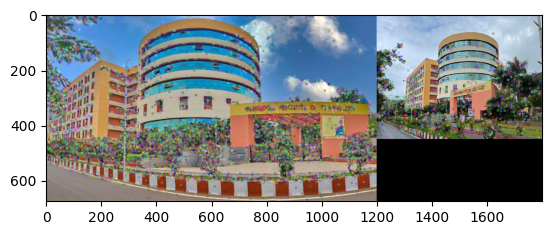

In [ ]:
matching_result= cv2.drawMatches(img3, keypoints3,
                                 img4, keypoints4, good_matches1, None)

plt.imshow(matching_result)

# Conclusion:

1. **HOG** effectively captures edge structures and gradients, making it suitable for detecting objects based on their shape and texture. The implementation of HOG provided a detailed feature vector, which can be further used for object detection tasks, demonstrating its robustness, especially in scenarios like pedestrian detection.

2. **SIFT**, on the other hand, proved highly efficient for tasks involving keypoint detection and matching across different images. The use of SIFT enabled successful image matching, indicating its reliability in object recognition and image comparison tasks.

In summary, both HOG and SIFT are powerful feature extraction techniques with unique strengths: HOG is ideal for object detection, while SIFT excels in keypoint matching and object recognition across varied image scales and orientations.